In [29]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

In [30]:
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [31]:
train_original=train.copy()

In [32]:
train.shape

(31962, 3)

In [33]:
train_original

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [34]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

In [35]:
test_original=test.copy()

In [36]:
test.shape

(17197, 2)

In [37]:
test_original

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [38]:
combine = pd.concat([train, test], ignore_index=True, sort=True)
print(combine)

          id  label                                              tweet
0          1    0.0   @user when a father is dysfunctional and is s...
1          2    0.0  @user @user thanks for #lyft credit i can't us...
2          3    0.0                                bihday your majesty
3          4    0.0  #model   i love u take with u all the time in ...
4          5    0.0             factsguide: society now    #motivation
...      ...    ...                                                ...
49154  49155    NaN  thought factory: left-right polarisation! #tru...
49155  49156    NaN  feeling like a mermaid ð #hairflip #neverre...
49156  49157    NaN  #hillary #campaigned today in #ohio((omg)) &am...
49157  49158    NaN  happy, at work conference: right mindset leads...
49158  49159    NaN  my   song "so glad" free download!  #shoegaze ...

[49159 rows x 3 columns]


In [39]:
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [40]:
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [41]:
def remove_pattern(text,pattern):

    r = re.findall(pattern,text)

    for i in r:
        text = re.sub(i,"",text)

    return text

In [42]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], r"@[\w]*") 

In [43]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

In [44]:
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [45]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fare talking before they leave. cha...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams.ð¯ can't think a...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,won!!! love land!!! #allin #cavs #champions #c...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here it's #gr8


In [46]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: Tidy_Tweets, dtype: object

In [47]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: Tidy_Tweets, dtype: object

In [48]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: societi #motiv


In [49]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [50]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])

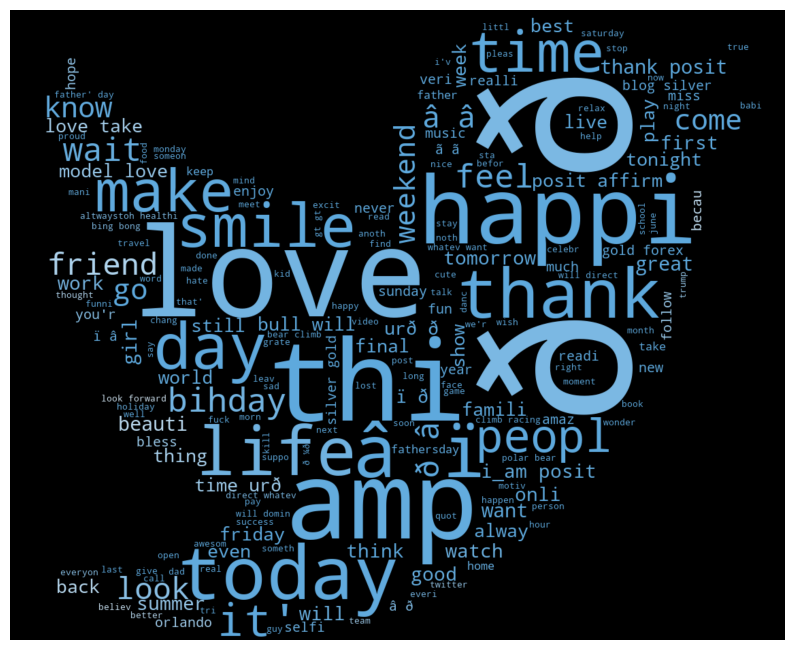

In [51]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

plt.figure(figsize=(10,20))

plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [52]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])

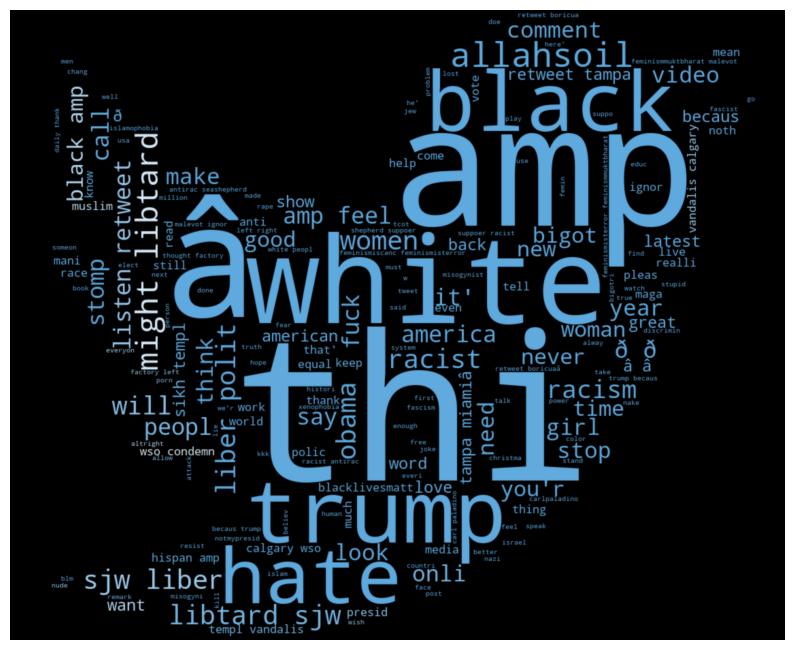

In [53]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

plt.figure(figsize=(10,20))

plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [54]:
def Hashtags_Extract(x):
    hashtags=[]

    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)

    return hashtags

In [55]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

In [56]:
ht_positive_unnest = sum(ht_positive,[])

In [57]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

In [58]:
ht_negative_unnest = sum(ht_negative,[])

In [59]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'love': 1576, 'posit': 905, 'smile': 636, 'healthi': 558, 'thank': 526, 'fun': 434, 'affirm': 422, 'life': 399, 'model': 374, 'summer': 362, ...})

In [60]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [61]:
df_positive.head(10)

,Hashtags,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374
5,motiv,195
6,allshowandnogo,1
7,school,27
8,exam,8
9,hate,26


In [62]:
df_positive_plot = df_positive.nlargest(20,columns='Count')

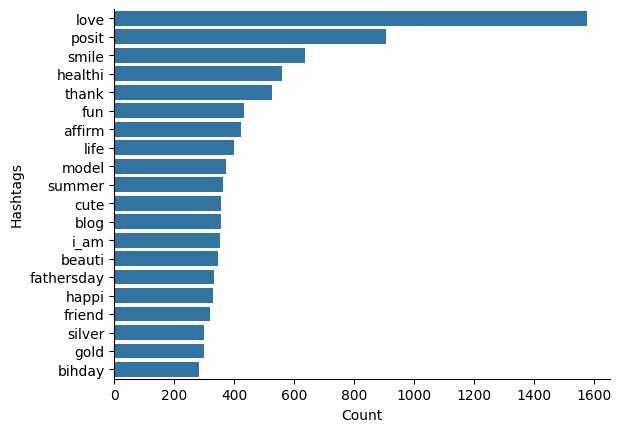

In [63]:
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [64]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

In [65]:
word_freq_negative

FreqDist({'trump': 133, 'polit': 94, 'allahsoil': 92, 'liber': 79, 'libtard': 77, 'sjw': 75, 'retweet': 57, 'black': 46, 'miamiâ': 38, 'hate': 36, ...})

In [66]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})


In [67]:
df_negative.head(10)

,Hashtags,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,6
9,xenophobia,12


In [68]:
df_negative_plot = df_negative.nlargest(20,columns='Count')

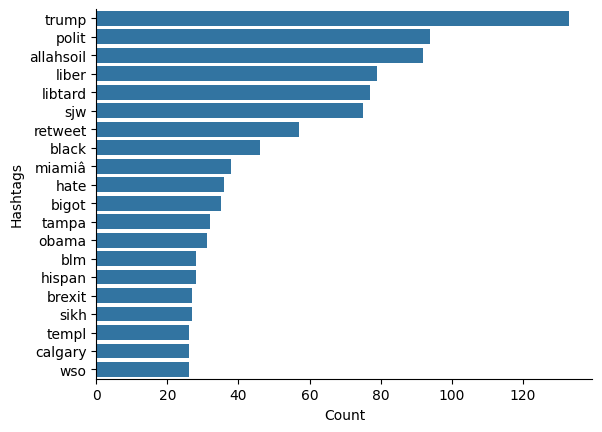

In [69]:
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [73]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)

In [76]:
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [79]:
Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [80]:
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[9.88522656e-01, 1.14773438e-02],
       [9.99902158e-01, 9.78419715e-05],
       [9.03848760e-01, 9.61512398e-02],
       ...,
       [7.06602565e-01, 2.93397435e-01],
       [9.43206058e-01, 5.67939417e-02],
       [9.63526312e-01, 3.64736878e-02]])

In [81]:
from sklearn.metrics import f1_score

In [82]:
prediction_int = prediction_bow[:,1] >= 0.3
prediction_int = prediction_int.astype(int)

log_bow = f1_score(y_valid_bow, prediction_int)
print("F1 Score (Bag-of-Words):", log_bow)


F1 Score (Bag-of-Words): 0.584070796460177


In [83]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [84]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.98359438, 0.01640562],
       [0.98185847, 0.01814153],
       [0.91844664, 0.08155336],
       ...,
       [0.96093067, 0.03906933],
       [0.93586749, 0.06413251],
       [0.97920102, 0.02079898]])

In [85]:
prediction_int = prediction_tfidf[:,1] >= 0.3
prediction_int = prediction_int.astype(int)

log_tfidf = f1_score(y_valid_tfidf, prediction_int)
print("F1 Score (TF-IDF):", log_tfidf)


F1 Score (TF-IDF): 0.5861486486486487


In [86]:
from xgboost import XGBClassifier

In [87]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [88]:
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=22, ...)

In [89]:
xgb=model_bow.predict_proba(x_valid_bow)
xgb

array([[9.9187911e-01, 8.1209205e-03],
       [9.9935114e-01, 6.4886967e-04],
       [9.3785286e-01, 6.2147118e-02],
       ...,
       [9.4486654e-01, 5.5133436e-02],
       [9.3785286e-01, 6.2147118e-02],
       [9.3785286e-01, 6.2147118e-02]], dtype=float32)

In [91]:
from sklearn.metrics import f1_score
import numpy as np
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost classifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Generate predictions on the validation set
xgb_pred = xgb_clf.predict(X_valid)

# Now you can proceed with the rest of your code
y_valid_bow = np.array(y_valid)

if y_valid_bow.shape != xgb_pred.shape:
    print("Shapes of y_valid_bow and xgb_pred are not compatible.")
    print("y_valid_bow shape:", y_valid_bow.shape)
    print("xgb_pred shape:", xgb_pred.shape)
else:
    if set(np.unique(y_valid_bow)) != {0, 1} or set(np.unique(xgb_pred)) != {0, 1}:
        raise ValueError("y_valid_bow and xgb_pred should contain only binary labels.")
    
    # Calculate F1 score
    xgb_f1 = f1_score(y_valid_bow, xgb_pred)
    print("F1 Score:", xgb_f1)

F1 Score: 0.9023255813953488


In [92]:
model_tfidf=XGBClassifier(random_state=29,learning_rate=0.7)

In [93]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=29, ...)

In [94]:
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[0.9985354 , 0.00146458],
       [0.99644077, 0.00355925],
       [0.95706755, 0.04293242],
       ...,
       [0.90701455, 0.09298544],
       [0.95706755, 0.04293242],
       [0.9958374 , 0.0041626 ]], dtype=float32)

In [95]:
from sklearn.metrics import f1_score
import numpy as np

threshold = 0.3
xgb_pred_tfidf = (xgb_tfidf >= threshold).astype(int)

if y_valid_tfidf.shape != xgb_pred_tfidf.shape:
    print("Shapes of y_valid_tfidf and xgb_pred_tfidf are not compatible.")
    print("y_valid_tfidf shape:", y_valid_tfidf.shape)
    print("xgb_pred_tfidf shape:", xgb_pred_tfidf.shape)
else:
    if set(np.unique(y_valid_tfidf)) != {0, 1} or set(np.unique(xgb_pred_tfidf)) != {0, 1}:
        raise ValueError("y_valid_tfidf and xgb_pred_tfidf should contain only binary labels.")

    # Calculate F1 score
    score = f1_score(y_valid_tfidf, xgb_pred_tfidf)
    print("F1 Score:", score)

Shapes of y_valid_tfidf and xgb_pred_tfidf are not compatible.
y_valid_tfidf shape: (9589,)
xgb_pred_tfidf shape: (9589, 2)


In [96]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

dct = DecisionTreeClassifier()

dct.fit(X_train, y_train)

DecisionTreeClassifier()

In [101]:
print("Training data shape:", x_train_bow.shape)
print("Validation data shape:", x_valid_bow.shape)

Training data shape: (22373, 1000)
Validation data shape: (9589, 1000)


In [103]:
from sklearn.metrics import f1_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Decision Tree Classifier
dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)

# Generate predictions on the validation set
dct_bow = dct.predict_proba(X_valid)[:, 1]  # Assuming binary classification, use the probabilities for the positive class

# Convert probabilities to binary predictions using a threshold of 0.3
dct_bow_binary = (dct_bow >= 0.3).astype(int)

# Calculate F1 score
dct_score_bow = f1_score(y_valid, dct_bow_binary)

print("F1 Score:", dct_score_bow)

F1 Score: 0.8468468468468469


In [104]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier()

In [105]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [106]:
Algo=['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)','LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

In [108]:
from sklearn.metrics import f1_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)

# Calculate F1 scores
log_bow = f1_score(y_valid, log_clf.predict(X_valid))
xgb_bow = f1_score(y_valid, xgb_clf.predict(X_valid))
dct_bow = f1_score(y_valid, dct.predict(X_valid))

# Create a DataFrame
Algo = ['Logistic (BoW)', 'XGBoost (BoW)', 'Decision Tree (BoW)']
score = [log_bow, xgb_bow, dct_bow]
compare = pd.DataFrame({'Model': Algo, 'F1_Score': score}, index=[i for i in range(1, 4)])

print(compare)

                 Model  F1_Score
1       Logistic (BoW)  0.842593
2        XGBoost (BoW)  0.902326
3  Decision Tree (BoW)  0.850679


In [109]:
compare.T

,1,2,3
Model,Logistic (BoW),XGBoost (BoW),Decision Tree (BoW)
F1_Score,0.842593,0.902326,0.850679


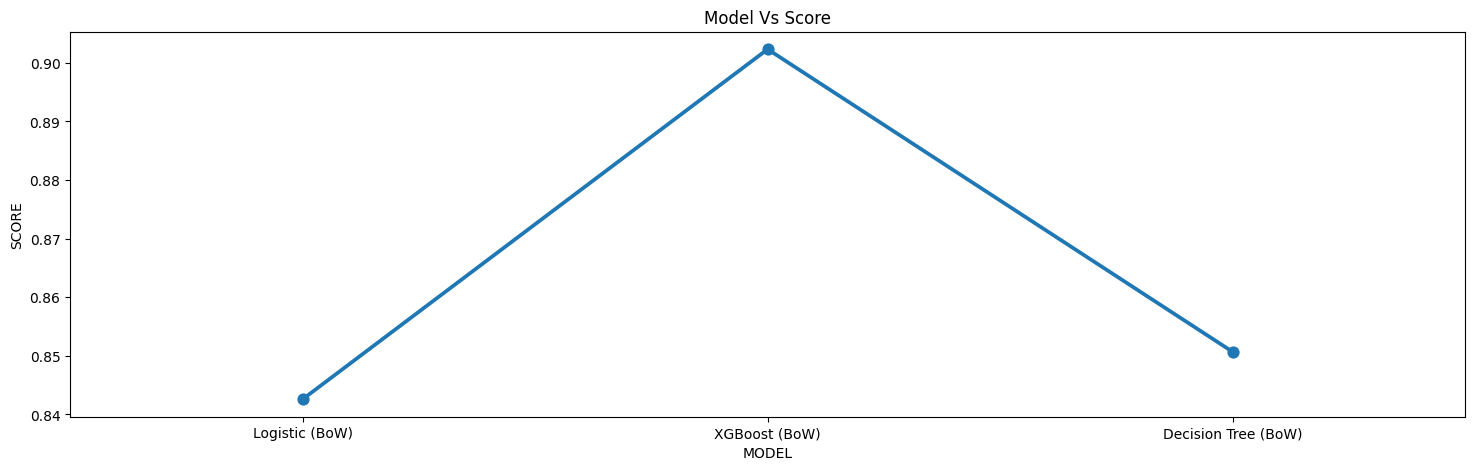

In [110]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare)

plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [111]:
test_tfidf = tfidf_matrix[31962:]

In [112]:
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3

test_pred_int = test_pred_int.astype(int)

test['label'] = test_pred_int

submission = test[['id','label']]

submission.to_csv('result.csv', index=False)


In [113]:
res = pd.read_csv('result.csv')

In [114]:
res

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
